In [168]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

from RhythmCount import data_processing as dproc
from RhythmCount import plot

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

np.set_printoptions(suppress=True)

plt.rcParams.update({'font.size': 18,'legend.fontsize': 14})
from IPython.display import Markdown as md, display

### Get data (already processed in other nb)

In [2]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220406.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_211220.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220216.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220601.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220504.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220105.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220919.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220727.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data

In [3]:
data_final = pd.DataFrame()

for path in data_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
    
    data_int = pd.read_csv(path)
    data_int = pd.DataFrame(data = data_int)

    if data_final.shape[0] == 0:
        data_final = data_int
    else:
        data_final = pd.concat([data_final, data_int], axis=0)
        
    print(data_final.shape)
    
data_final.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220406.csv
(38010, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_211220.csv
(147584, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220216.csv
(161585, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220601.csv
(213723, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220504.csv
(269648, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220105.csv
(395903, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220919.csv
(449881, 33)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/polysubstance/data/final_data/RFID/RFID_220727.csv
(541110, 33)
/Users/ab

,Unnamed: 0,Round,Build,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes
0,0,fentanyl,four_eight,na,5,041AC16B6B,NaN,na,female,3,fent_05,Spyder1.21,1.373,light,light_day1,1,15,17,21,2022-04-06 15:17:21.590966400,2022-04-06 15:17:22.963966400,15:17:21,15:17:22,917,55041,15,917,54981,Idspyder-22.04.06.csv,22.7,NaN,NaN,NaN
1,1,fentanyl,four_eight,na,5,041AC16B6B,NaN,na,female,3,fent_10,Spyder1.02,10.356,light,light_day1,1,15,24,4,2022-04-06 15:24:04.083033600,2022-04-06 15:24:14.439033600,15:24:04,15:24:14,924,55444,15,924,55384,Idspyder-22.04.06.csv,22.7,NaN,NaN,NaN
2,2,fentanyl,four_eight,na,5,041AC16B6B,NaN,na,female,3,water,Spyder1.04,2.004,light,light_day1,1,15,24,41,2022-04-06 15:24:41.084956800,2022-04-06 15:24:43.088956800,15:24:41,15:24:43,924,55481,15,924,55421,Idspyder-22.04.06.csv,22.7,NaN,NaN,NaN
3,3,fentanyl,four_eight,na,5,041AC16B6B,NaN,na,female,3,water,Spyder1.04,2.405,light,light_day1,1,15,24,45,2022-04-06 15:24:45.003024000,2022-04-06 15:24:47.408024000,15:24:45,15:24:47,924,55485,15,924,55425,Idspyder-22.04.06.csv,22.7,NaN,NaN,NaN
4,4,fentanyl,four_eight,na,5,041AC16B6B,NaN,na,female,3,fent_20,Spyder1.03,1.882,light,light_day1,1,15,25,49,2022-04-06 15:25:49.629014399,2022-04-06 15:25:51.511014399,15:25:49,15:25:51,925,55549,15,925,55489,Idspyder-22.04.06.csv,22.7,NaN,NaN,NaN


In [4]:
data_final = data_final[data_final['Round']=='poly']

In [5]:
data_final['Housing'] = ['single' if x==1 else 'multiple' for x in data_final['Cage_N']]

In [6]:
len(data_final['IdRFID'].unique())

95

#### keep days 1-9 (remove mice will less than 9 days)

<AxesSubplot:xlabel='day', ylabel='count'>

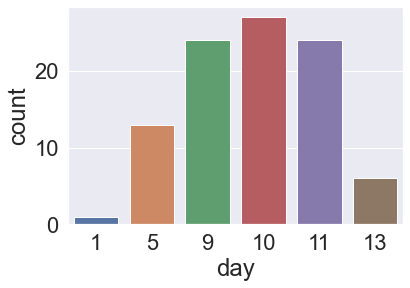

In [7]:
IdRFID_daycount = data_final.groupby('IdRFID')['day'].max().reset_index()

sns.countplot(x=IdRFID_daycount["day"])

In [8]:
IdRFID_keep = IdRFID_daycount[IdRFID_daycount['day']>8]['IdRFID'].values

data_final = data_final[data_final['IdRFID'].isin(IdRFID_keep)]
data_final = data_final[data_final['day']<10]

print(len(data_final['IdRFID'].unique()))

data_final.head()

81


,Unnamed: 0,Round,Build,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes,Housing
0,0,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.10,2.132,light,light_day1,1,15,13,30,2022-06-01 15:13:30.167961600,2022-06-01 15:13:32.299961600,15:13:30,15:13:32,913,54810,15,913,54750,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
1,1,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.04,1.833,light,light_day1,1,15,16,18,2022-06-01 15:16:18.513955200,2022-06-01 15:16:20.346955200,15:16:18,15:16:20,916,54978,15,916,54918,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
2,2,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.04,0.888,light,light_day1,1,15,16,22,2022-06-01 15:16:22.160985600,2022-06-01 15:16:23.048985600,15:16:22,15:16:23,916,54982,15,916,54922,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
3,3,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_20,Spyder1.01,1.416,light,light_day1,1,15,16,30,2022-06-01 15:16:30.145987200,2022-06-01 15:16:31.561987200,15:16:30,15:16:31,916,54990,15,916,54930,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
4,4,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,etoh_05,Spyder1.06,1.130,light,light_day1,1,15,17,14,2022-06-01 15:17:14.528976000,2022-06-01 15:17:15.658976000,15:17:14,15:17:15,917,55034,15,917,54974,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple


#### Lost RFID or clicking

In [9]:
data_final['notes'].value_counts()

click                  132415
RFID and VDM offset    46558 
clicking               24312 
click; lost RFID       13687 
Name: notes, dtype: int64

In [10]:
data_final = data_final[data_final['notes']!='click']
data_final = data_final[data_final['notes']!='clicking']
data_final = data_final[data_final['notes']!='click; lost RFID']

print(len(data_final['IdRFID'].unique()))

63


In [11]:
data_final['IdRFID'].value_counts()

041AC16321    24194
041AC03290    23467
041AC166B1    22943
041AC1682D    19174
041AC166D7    17921
041AC160F9    16436
041AC16672    16057
041ABFFA62    16020
041ABFEE18    15902
041AC169DC    15880
041AC15E98    15846
041AC1678E    15652
041AC16ADE    15375
041AC162F0    15325
041AC16499    14082
041AC01C83    13834
041AC16B67    13756
041AC166C2    13628
041AC01110    13161
041AC16530    12431
041AC001FC    11590
041AC160C0    11362
041AC15F27    10912
041AC16B5A    10553
041AC16A73    10523
041AC15ECD    10453
041ABFEA34    10234
041AC16317    9803 
041AC165FE    9281 
041AC16447    8848 
041AC16A00    8800 
041AC1689B    8463 
041AC165A6    8455 
041AC16782    8211 
041AC1677D    7950 
041AC165B6    7897 
041AC163D0    7817 
041AC1667D    7728 
041AC16486    7386 
041AC168BD    7368 
041AC15DF7    7287 
041AC1620E    7272 
041AC15F30    7246 
041AC166BB    6943 
041ABFE86A    6743 
041AC15DE9    6499 
041AC15ED3    6237 
041AC16579    6110 
041AC02E82    5993 
041AC1646F    5799 


#### Exclude nan for IdRFID

In [12]:
print(data_final.shape)
    
data_final = data_final[~data_final['IdRFID'].isna()]
print(data_final.shape)
    
data_final.head()

(641633, 34)
(641633, 34)


,Unnamed: 0,Round,Build,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes,Housing
0,0,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.10,2.132,light,light_day1,1,15,13,30,2022-06-01 15:13:30.167961600,2022-06-01 15:13:32.299961600,15:13:30,15:13:32,913,54810,15,913,54750,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
1,1,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.04,1.833,light,light_day1,1,15,16,18,2022-06-01 15:16:18.513955200,2022-06-01 15:16:20.346955200,15:16:18,15:16:20,916,54978,15,916,54918,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
2,2,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_05,Spyder1.04,0.888,light,light_day1,1,15,16,22,2022-06-01 15:16:22.160985600,2022-06-01 15:16:23.048985600,15:16:22,15:16:23,916,54982,15,916,54922,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
3,3,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,fent_20,Spyder1.01,1.416,light,light_day1,1,15,16,30,2022-06-01 15:16:30.145987200,2022-06-01 15:16:31.561987200,15:16:30,15:16:31,916,54990,15,916,54930,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple
4,4,poly,NaN,na,1,041AC166ED,1864.0,na,male,3,etoh_05,Spyder1.06,1.130,light,light_day1,1,15,17,14,2022-06-01 15:17:14.528976000,2022-06-01 15:17:15.658976000,15:17:14,15:17:15,917,55034,15,917,54974,Idspyder-22.06.01.csv,35.2,NaN,NaN,NaN,multiple


### Sum by second (RFID sensor is 100 Hz)

In [13]:
data_final = data_final[['Round', 'notes', 'Cage', 'IdRFID', 'Animal', 'Sex', 'Housing', 
                         'unitLabel_drink', 'unitLabel', 
                         'ld_cycle', 'ld_day', 'day', 
                         'RFID_hour', 'RFID_min', 'RFID_second', 
                         'RFID_min_count', 'RFID_sec_count', 
                         'RFID_hour_count_running', 'RFID_min_count_running', 
                         'RFID_sec_count_running',
                         'eventDuration', ]]

print(data_final.shape)
print(len(data_final['IdRFID'].unique()))
data_final.head()

(641633, 21)
63


,Round,notes,Cage,IdRFID,Animal,Sex,Housing,unitLabel_drink,unitLabel,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,eventDuration
0,poly,NaN,1,041AC166ED,1864.0,male,multiple,fent_05,Spyder1.10,light,light_day1,1,15,13,30,913,54810,15,913,54750,2.132
1,poly,NaN,1,041AC166ED,1864.0,male,multiple,fent_05,Spyder1.04,light,light_day1,1,15,16,18,916,54978,15,916,54918,1.833
2,poly,NaN,1,041AC166ED,1864.0,male,multiple,fent_05,Spyder1.04,light,light_day1,1,15,16,22,916,54982,15,916,54922,0.888
3,poly,NaN,1,041AC166ED,1864.0,male,multiple,fent_20,Spyder1.01,light,light_day1,1,15,16,30,916,54990,15,916,54930,1.416
4,poly,NaN,1,041AC166ED,1864.0,male,multiple,etoh_05,Spyder1.06,light,light_day1,1,15,17,14,917,55034,15,917,54974,1.130


In [14]:
data_final_short = data_final.groupby(['Round', 'Cage', 'IdRFID', 'Animal', 'Sex', 'Housing', 
                                       'unitLabel_drink', 'unitLabel', 'ld_cycle', 'ld_day', 'day', 
                                       'RFID_hour', 'RFID_min', 'RFID_second', 
                                       'RFID_min_count', 'RFID_sec_count', 
                                       'RFID_hour_count_running', 'RFID_min_count_running', 
                                       'RFID_sec_count_running'])['eventDuration'].sum().reset_index()

print(data_final_short.shape)
print(len(data_final_short['IdRFID'].unique()))

data_final_short.head()

(641102, 20)
63


,Round,Cage,IdRFID,Animal,Sex,Housing,unitLabel_drink,unitLabel,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,eventDuration
0,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,7,58,1087,65278,18,1087,65218,2.671
1,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,31,1133,68011,18,1133,67951,0.125
2,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,37,1133,68017,18,1133,67957,15.861
3,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,54,1133,68034,18,1133,67974,4.961
4,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,55,8,1135,68108,18,1135,68048,1.917


### Viz sum, count, and ratio data

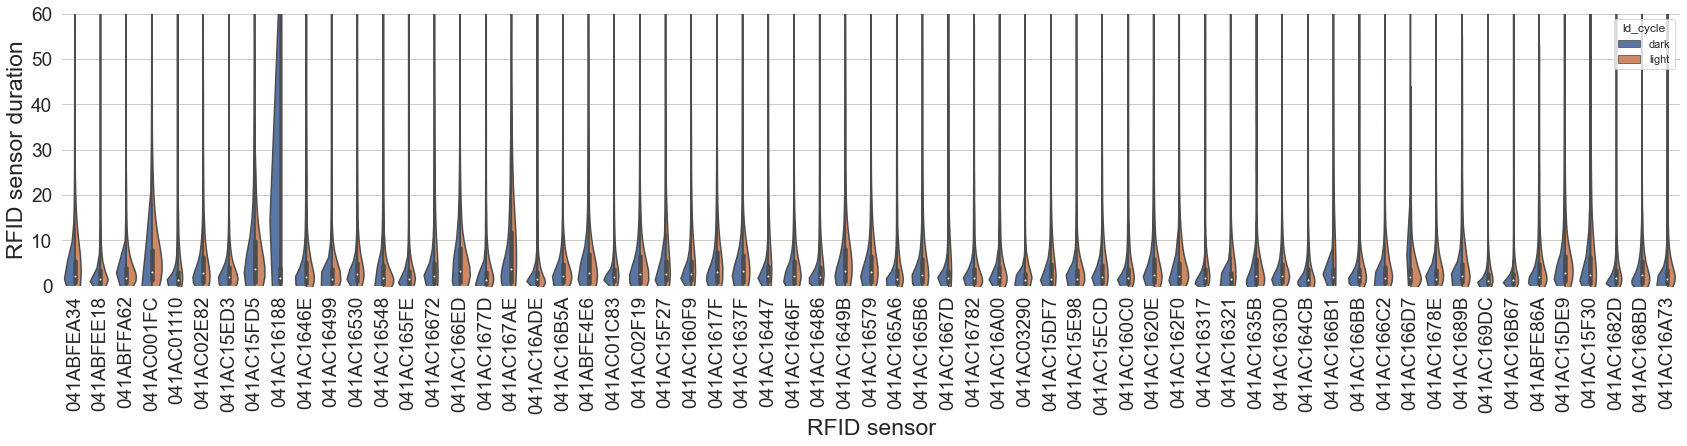

In [37]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(29,5))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.violinplot(x='IdRFID', y='eventDuration', data=data_final_short,  estimator='mean',
               ci=68, hue="ld_cycle", split=True)

plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)

plt.xlabel('RFID sensor', fontsize=23)
plt.ylabel('RFID sensor duration', fontsize=23)
plt.ylim(0,60)
plt.show()

#### Viz RFID data across days

In [81]:
RFID_count = data_final_short.groupby(['IdRFID', 'Sex', 'Housing', 'day', 'ld_cycle',])['eventDuration'].count().reset_index(name='count')
RFID_sum = data_final_short.groupby(['IdRFID', 'Sex', 'Housing', 'day', 'ld_cycle',])['eventDuration'].sum().reset_index(name='sum')

RFID_summary_dayrun = RFID_count.merge(RFID_sum)

RFID_summary_dayrun['ratio'] = RFID_summary_dayrun['sum'] / RFID_summary_dayrun['count']

print(len(RFID_summary_dayrun['IdRFID'].unique()))
print(RFID_summary_dayrun.shape)
RFID_summary_dayrun.head()

63
(1125, 8)


,IdRFID,Sex,Housing,day,ld_cycle,count,sum,ratio
0,041ABFE4E6,male,multiple,1,dark,718,5033.526,7.010482
1,041ABFE4E6,male,multiple,1,light,61,314.541,5.156410
2,041ABFE4E6,male,multiple,2,dark,571,4712.063,8.252299
3,041ABFE4E6,male,multiple,2,light,51,313.221,6.141588
4,041ABFE4E6,male,multiple,3,dark,275,3000.850,10.912182


In [82]:
RFID_summary_dayrun = RFID_summary_dayrun[RFID_summary_dayrun['IdRFID']!='041AC167AE']

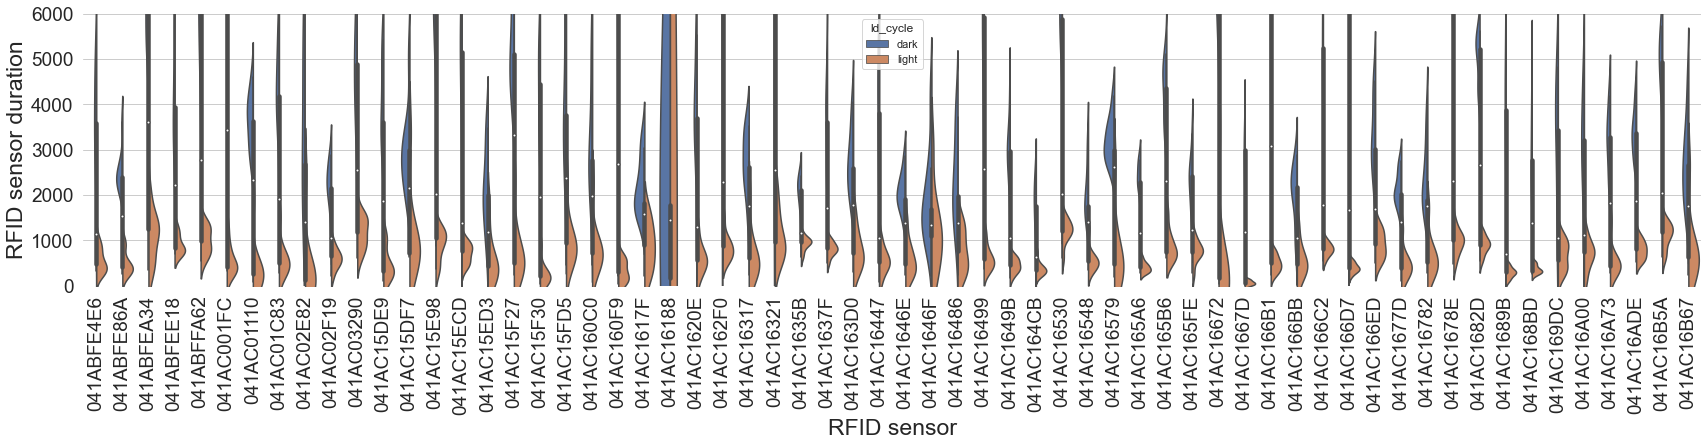

In [83]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(29,5))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.violinplot(x='IdRFID', y='sum', data=RFID_summary_dayrun,  estimator='mean',
               ci=68, hue="ld_cycle", split=True)

plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)

plt.xlabel('RFID sensor', fontsize=23)
plt.ylabel('RFID sensor duration', fontsize=23)
plt.ylim(0,6000)
plt.show()

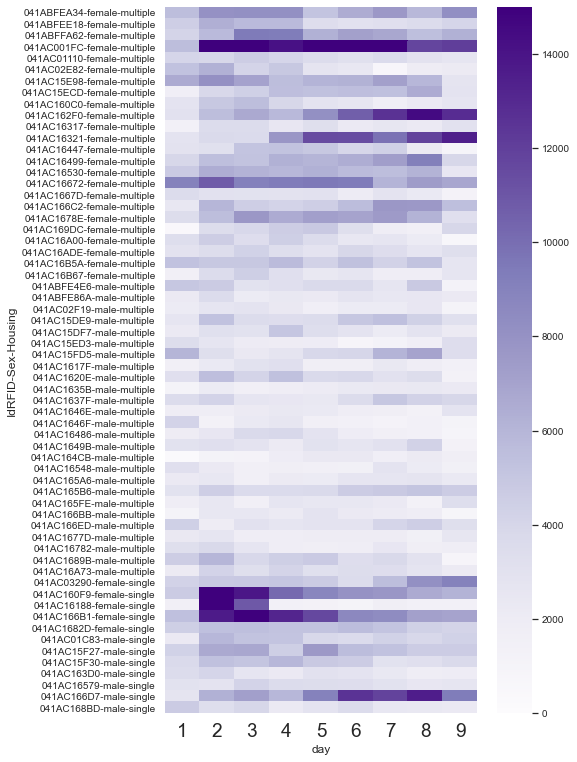

In [110]:
groupby = pd.pivot_table(RFID_summary_dayrun[RFID_summary_dayrun['ld_cycle']=='dark'], values='sum', index=['IdRFID', 'Sex', 'Housing'],
                    columns=['day'])

groupby = groupby.sort_values(['Housing', 'Sex'])

sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=10) 
    
plt.figure(figsize=(7,13))
    
sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=15000)
    
plt.show()

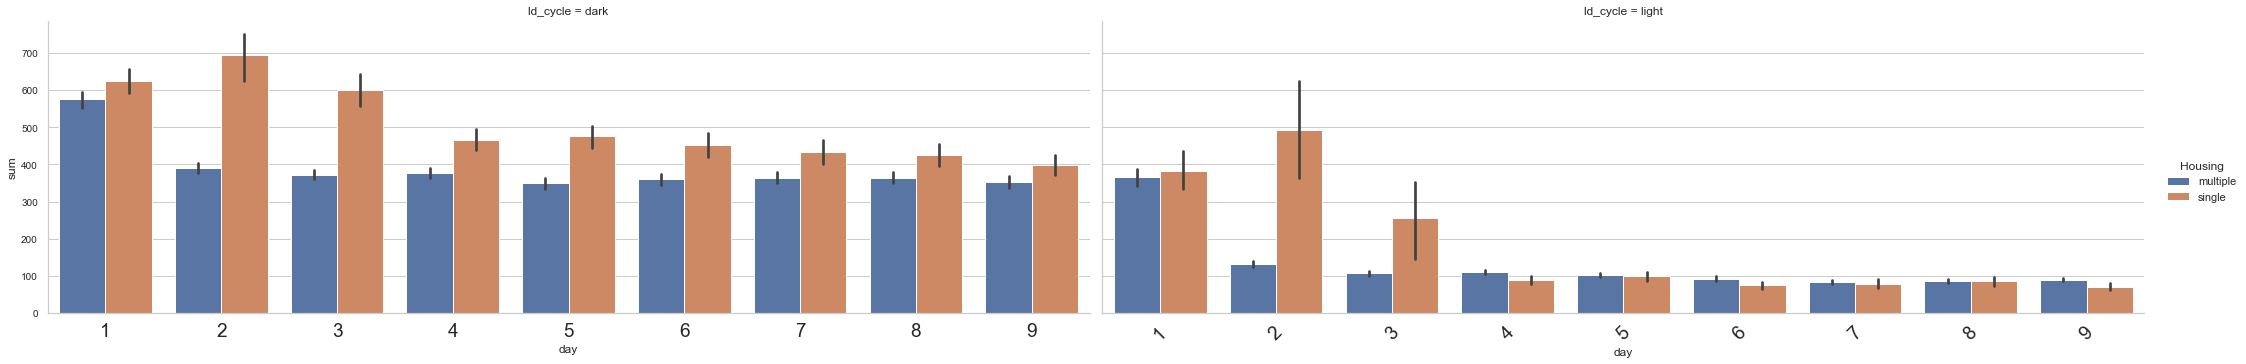

In [31]:
sns.catplot(x='day', y='sum', data=RFID_summary_hourrun,  kind='bar', 
            ci=68, height=5, aspect=3, hue='Housing', col='ld_cycle' )

#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

#### Viz RFID data across days and hours

In [112]:
RFID_count = data_final_short.groupby(['IdRFID', 'Sex', 'Housing', 'day', 'ld_cycle', 'RFID_hour_count_running'])['eventDuration'].count().reset_index(name='count')
RFID_sum = data_final_short.groupby(['IdRFID', 'Sex', 'Housing', 'day', 'ld_cycle', 'RFID_hour_count_running'])['eventDuration'].sum().reset_index(name='sum')

RFID_summary_hourrun = RFID_count.merge(RFID_sum)

RFID_summary_hourrun['ratio'] = RFID_summary_hourrun['sum'] / RFID_summary_hourrun['count']

print(len(RFID_summary_hourrun['IdRFID'].unique()))
print(RFID_summary_hourrun.shape)
RFID_summary_hourrun.head()

63
(9405, 9)


,IdRFID,Sex,Housing,day,ld_cycle,RFID_hour_count_running,count,sum,ratio
0,041ABFE4E6,male,multiple,1,dark,18,82,363.050,4.427439
1,041ABFE4E6,male,multiple,1,dark,19,96,670.598,6.985396
2,041ABFE4E6,male,multiple,1,dark,20,121,863.806,7.138893
3,041ABFE4E6,male,multiple,1,dark,21,162,1192.317,7.359981
4,041ABFE4E6,male,multiple,1,dark,22,122,808.935,6.630615


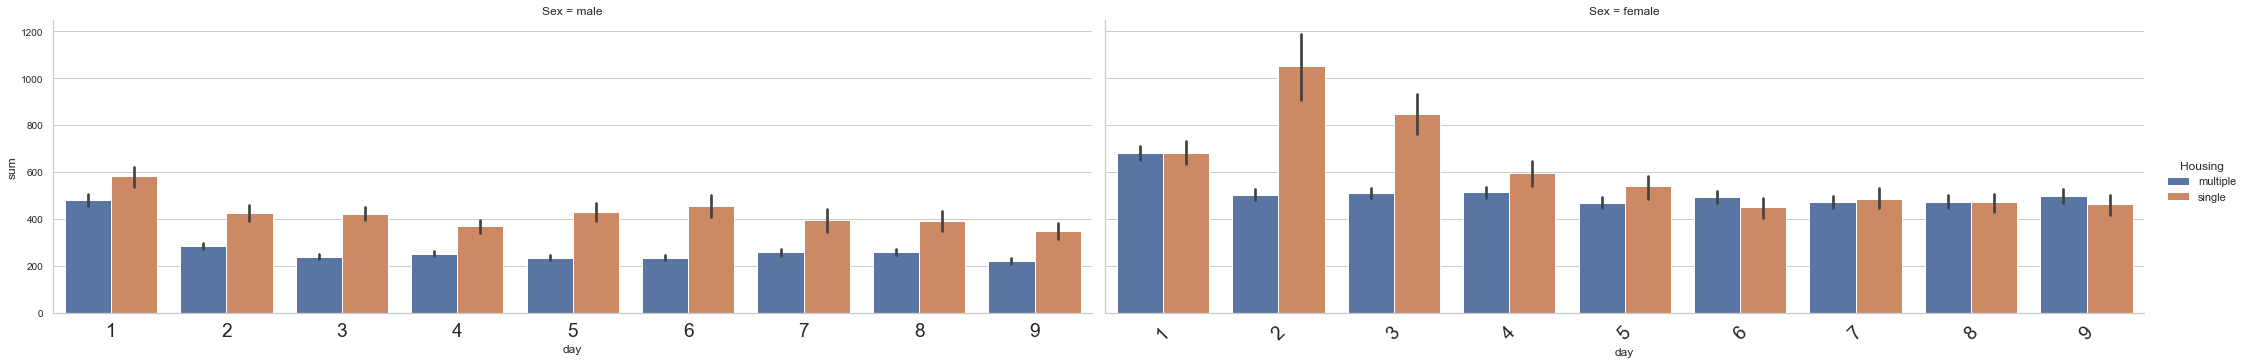

In [118]:
sns.catplot(x='day', y='sum', data=RFID_summary_hourrun[RFID_summary_hourrun['ld_cycle']=='dark'],  kind='bar', 
            ci=68, height=5, aspect=3, hue='Housing', col='Sex' )

#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

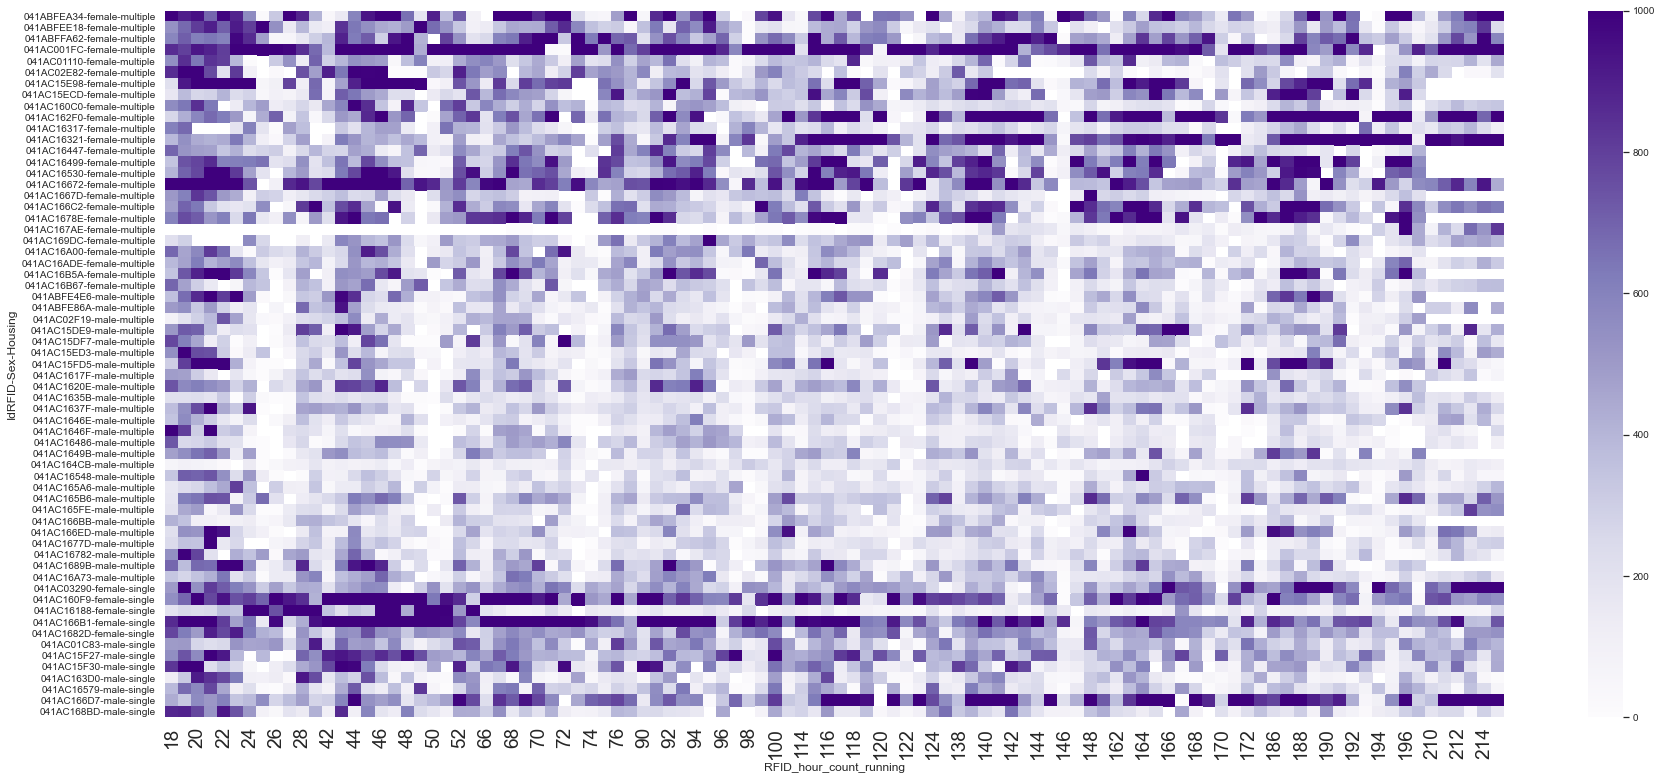

In [116]:
groupby = pd.pivot_table(RFID_summary_hourrun[RFID_summary_hourrun['ld_cycle']=='dark'], values='sum', index=['IdRFID', 'Sex', 'Housing'],
                    columns=['RFID_hour_count_running'])

groupby = groupby.sort_values(['Housing', 'Sex'])

sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=10) 
    
plt.figure(figsize=(30,13))
    
sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=1000)
    
plt.show()

### RhythmCount

In [122]:
#starting dataframe needs 3 columns, X==time, Y==countdata, Z==categorical

#supplied example data
df_covid = pd.read_csv('supp_file_1.csv')

df_covid.head()

,X,Y,time_period
0,0.0,597.0,April 2019
1,1.0,518.0,April 2019
2,2.0,416.0,April 2019
3,3.0,522.0,April 2019
4,4.0,857.0,April 2019


In [124]:
df_covid['time_period'].value_counts()

November 2020    831
April 2020       505
November 2019    504
April 2019       504
Name: time_period, dtype: int64

In [160]:
count_models = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [158]:
data_final_short.loc[(data_final_short['Sex']=='male')&(data_final_short['Housing']=='single'), 'comb_group'] = 'male_single'
data_final_short.loc[(data_final_short['Sex']=='male')&(data_final_short['Housing']=='multiple'), 'comb_group'] = 'male_mult'
data_final_short.loc[(data_final_short['Sex']=='female')&(data_final_short['Housing']=='single'), 'comb_group'] = 'female_single'
data_final_short.loc[(data_final_short['Sex']=='female')&(data_final_short['Housing']=='multiple'), 'comb_group'] = 'female_mult'

data_final_short.head()

,Round,Cage,IdRFID,Animal,Sex,Housing,unitLabel_drink,unitLabel,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,eventDuration,comb_group
0,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,7,58,1087,65278,18,1087,65218,2.671,female_mult
1,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,31,1133,68011,18,1133,67951,0.125,female_mult
2,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,37,1133,68017,18,1133,67957,15.861,female_mult
3,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,53,54,1133,68034,18,1133,67974,4.961,female_mult
4,poly,1,041ABFEA34,1980.0,female,multiple,etoh_05,Spyder1.05,dark,dark_night1,1,18,55,8,1135,68108,18,1135,68048,1.917,female_mult


In [167]:
RFID_rhythm = data_final_short.groupby(['IdRFID', 'comb_group', 'RFID_hour'])['eventDuration'].sum().reset_index(name='sum')
RFID_rhythm = RFID_rhythm[['RFID_hour', 'sum', 'comb_group']]
RFID_rhythm.columns = ['X', 'Y', 'comb_group']

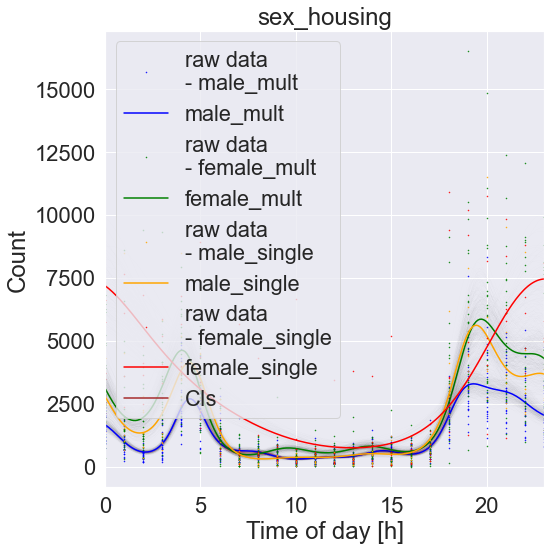

Can not save plot.


In [169]:
df_results = dproc.compare_by_component(RFID_rhythm, 'comb_group', n_components, count_models, ax_indices=[1,1,1,1],
                           ax_titles=['sex_housing'], rows=1, cols=1)

In [171]:
# round
df_results=df_results[['comb_group','count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue',]]

df_results=df_results.round(2)

display(df_results)

,comb_group,count_model,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue
0,male_mult,gen_poisson,7.0,1493.43,1794.09,"[4.4, 19.32]","[2690.99, 3287.52]","[1386.75, 1657.14]","[1671.23, 1958.28]","[[4.35, 4.58], [18.73, 20.17]]","[[2508.76, 2911.32], [3061.82, 3611.58]]",9429.37,9500.35,-4698.68,0.0
1,female_mult,gen_poisson,5.0,2694.32,3164.39,"[4.0, 19.72, 22.22]","[4620.68, 5858.71, 4486.98]","[2281.07, 3077.75]","[2731.88, 3566.11]","[[3.91, 4.19], [19.47, 19.94], [22.02, 22.99]]","[[4363.87, 4911.87], [5017.25, 6639.57], [4280.34, 4788.56]]",9782.09,9834.63,-4879.04,0.0
2,male_single,gen_poisson,5.0,2655.23,2961.10,[19.42],[5616.32],"[2353.06, 3039.84]","[2606.65, 3361.86]","[19.27, 19.71]","[4963.24, 6398.17]",2600.44,2637.71,-1288.22,0.0
3,female_single,gen_poisson,2.0,3356.12,4101.53,[23.02],[7457.66],"[2998.17, 3701.58]","[3628.36, 4584.15]","[22.33, 23.83]","[6652.32, 8259.94]",2063.48,2080.11,-1025.74,0.0


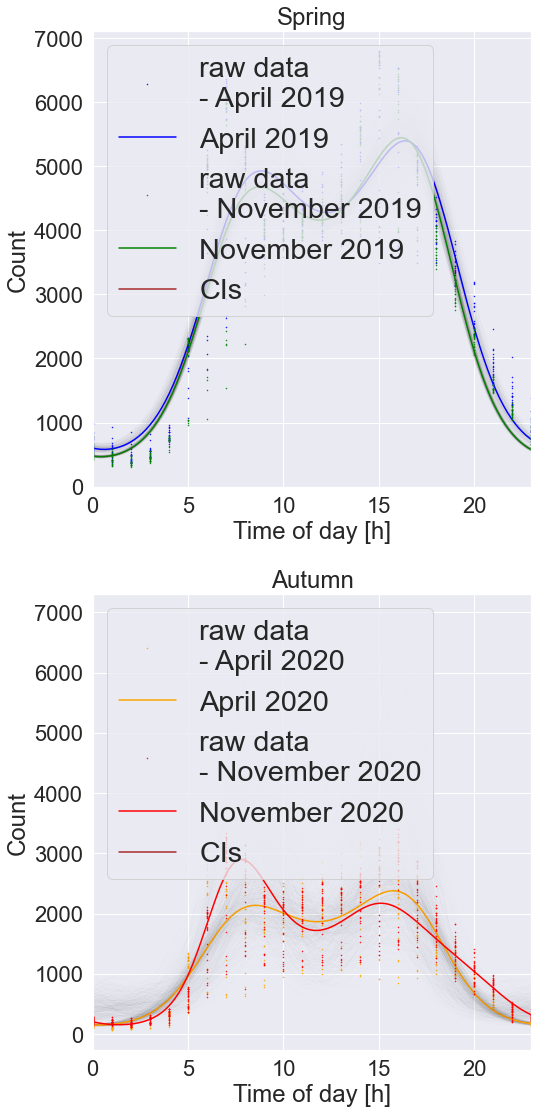

Can not save plot.


In [155]:
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, count_models, ax_indices=[1, 1, 2, 2],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='figure1.png')

### Compare across cages - is there a sipper preference

In [ ]:
sns.displot(data=d, x="VDM_RFID_timediff", kind="ecdf", hue='RFID_assign_id_pre')
plt.xlabel('Time difference VDM-RFID (sec)')
plt.xlim(-1,60 )
plt.ylim(0,1.1)
plt.xlabel('Time difference VDM-RFID (sec)', fontsize=23)
plt.ylabel('Proportion', fontsize=23)
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 
plt.show()

In [ ]:
data_final_clean_3s = data_final_clean[data_final_clean['VDM_RFID_timediff']<3]

data_final_clean_3s.to_csv('data_final_clean_3s_221019.csv')

In [ ]:
data_final_clean_3s_gb = data_final_clean_3s.groupby(['Round', 'VDM_file', 'variable', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count', 
                                   'substance', ])[['value', 'value_wt', 'VDM_RFID_timediff']].sum().reset_index()

data_final_clean_3s_gb.head()

In [ ]:
d=data_final_clean_3s_gb[data_final_clean_3s_gb['Round']=='poly']

sns.catplot(x='substance', y='value', data=d,  kind='bar', 
            ci=68, height=5, aspect=1, hue='variable', )

plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

### Summary graphs

In [ ]:
data_final_clean_3s_gb = data_final_clean_3s.groupby(['Round', 'VDM_file', 'variable', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count',  
                                   'substance', ])[['value', 'value_wt', 'VDM_RFID_timediff']].sum().reset_index()

data_final_clean_3s_gb['Daily intake (g/kg)'] = data_final_clean_3s_gb['value_wt']
data_final_clean_3s_gb['Daily intake (ml)'] = data_final_clean_3s_gb['value']
d = data_final_clean_3s_gb[data_final_clean_3s_gb['Round']=='poly']
d['Housing'] = ['single' if x==1 else 'multiple' for x in d['Cage_N']]
d.head()

In [ ]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

order = ['water', 'EtOH05', 'EtOH10', 'Fent05', 'Fent20']
sns.catplot(x='substance', y='Daily intake (ml)', data=d[d['Sex']=='male'],  kind='bar', 
            ci=68, hue='Housing', order=order)

plt.xlabel('Substance', fontsize=23)
plt.ylabel('Total volume per day (mL)', fontsize=23)
plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

In [ ]:
for sub in d['substance'].unique():
    print(sub)
    d2 = d[d['substance']==sub].sort_values('Cage_N')
    groupby = d2[d2['day_count']<11].groupby(['IdRFID', 'day_count'])['Daily intake (ml)'].sum().reset_index()
    groupby = groupby.pivot('IdRFID', 'day_count', "Daily intake (ml)")
    
    sns.set_theme(style="whitegrid")

    plt.rc('xtick', labelsize=19) 
    plt.rc('ytick', labelsize=10) 
    
    plt.figure(figsize=(5,13))
    
    sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=10, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})
    
    plt.xlabel('Day', fontsize=23)
    plt.ylabel('RFID', fontsize=23)
    plt.title(sub, fontsize=23)
    #plt.xticks(rotation=45)
    plt.show()

In [ ]:
for sub in d['IdRFID'].unique():
    print(sub)
    d2 = d[d['IdRFID']==sub]
    groupby = d2.groupby(['substance', 'day_count'])['value'].sum().reset_index()
    groupby = groupby.pivot('substance', 'day_count', "value")
    plt.figure(figsize=(5,7))
    ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=5, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})
    #plt.xlabel('Bottle')
    plt.show()

In [ ]:
data_final_clean_3s[data_final_clean_3s['Round']=='flavor']['IdRFID'].value_counts()

In [ ]:
d=data_final_clean_3s[data_final_clean_3s['Round']=='flavor']
d=d[d['day_count']<8]
colorCodes = ['C{}'.format(i) for i in range(6)]



param = 'sec_count_running'

data_1 = d[d['IdRFID'] == '041ABFF18E'][param].values
data_2 = d[d['IdRFID'] == '041ABFF5CF'][param].values
data_3 = d[d['IdRFID'] == '041A555C38'][param].values
data_4 = d[d['IdRFID'] == '041AC03717'][param].values
data_5 = d[d['IdRFID'] == '041AC00A9F'][param].values
data_6 = d[d['IdRFID'] == '041ABFE8D4'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6])

# Draw a spike raster plot
plt.figure(figsize=(90,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5], 
           ['1', '2', '3', '4', '5', '6'])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('IdRFID')


plt.show()

In [ ]:
d=data_final_clean_3s[data_final_clean_3s['Round']=='poly']
d_f5 = d[d['substance']=='Fent05']
d_e5 = d[d['substance']=='EtOH05']
d_w = d[d['substance']=='water']

colorCodes = ['C{}'.format(i) for i in range(6)]



param = 'sec_count_running'

data_1 = d_f5[d_f5['IdRFID'] == '041AC16447'][param].values
data_2 = d_e5[d_e5['IdRFID'] == '041AC16447'][param].values
data_3 = d_w[d_w['IdRFID'] == '041AC16447'][param].values
data_4 = d_f5[d_f5['IdRFID'] == '041AC1620E'][param].values
data_5 = d_e5[d_e5['IdRFID'] == '041AC1620E'][param].values
data_6 = d_w[d_w['IdRFID'] == '041AC1620E'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6])

# Draw a spike raster plot
plt.figure(figsize=(90,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5], 
           ['F5', 'E5', 'W', 'F5', 'E5', 'W',])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('IdRFID')


plt.show()

### Summarize and combine with AM behavior

In [ ]:
data_clean.to_csv('poly_data_220805.csv')

In [ ]:
data_gbmean = data_clean.groupby(['VDM_file', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count', 
                                   'substance', ])[['value', 'value_wt']].sum().reset_index()

data_gbmean.head()

In [ ]:
hue_order=['water', 'Fent05', 'Fent20', 'EtOH05', 'EtOH10']

sns.catplot(x='Sex', y='value_wt', data=data_gbmean[data_gbmean['day_count']<5],  kind='bar', 
            ci=68, height=5, aspect=1, hue='substance', hue_order=hue_order,
            col='Cage_N')


plt.ylabel('Daily Intake (ml)')

plt.show()

In [ ]:
path_behav = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/meta/RFID_VDM_behavior.xlsx'

data_behav = pd.read_excel(path_behav)
data_behav = pd.DataFrame(data = data_behav)

data_behav.head()

In [ ]:
sns.catplot(x='Sex', y='Entries', data=data_behav[data_behav['Behavior']=='EZM'],  kind='bar', 
            ci=68, height=5, aspect=1, hue='Session')

In [ ]:
sns.lmplot(x='Dominance', y='Latency', data=data_behav[data_behav['Behavior']=='OFB'], hue='Session')

In [ ]:
data_gbmean_beh = data_gbmean.merge(data_behav, on=['IdRFID'])

data_gbmean_beh.head()

In [ ]:
d=data_gbmean_beh[data_gbmean_beh['Behavior']=='EZM']
d=d[d['Session']==1]

sns.lmplot(x='Dominance', y='value', data=d[d['substance']!='water'], col='substance')